In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/USMinWage.csv')

In [6]:
act_min_wage = pd.DataFrame()

for state, data in df.groupby('State'):
    if act_min_wage.empty:
        act_min_wage = data.set_index('Year')[['Low.2018']].rename(columns={'Low.2018':state})
    else:
        act_min_wage = act_min_wage.join(data.set_index('Year')[['Low.2018']].rename(columns={'Low.2018':state}))


min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()


In [8]:
min_wage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,Idaho,Indiana,Kentucky,Maine,Maryland,Massachusetts,Michigan,Minnesota,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,0.371515,0.352950,-0.569134,0.784052,0.487056,0.726248,0.606292,-0.384472,-0.142350,0.713637,0.817509,0.726091,0.521504,0.881634,0.454404,-0.002899,-0.181850,0.308927,-0.008462,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,-0.006833,-0.116454,0.427054,-0.059840,0.443650,-0.136325,0.113882,0.452996,0.180337,-0.005549,-0.192707,-0.093417,0.042759,-0.236279,0.413676,0.304853,0.296669,-0.212602,0.274903,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,0.623225,0.793831,-0.152946,0.716943,0.377899,0.942760,0.654850,-0.318507,0.232873,0.537317,0.559870,0.643447,0.538274,0.763132,0.450594,0.204418,0.072433,-0.315364,0.439329,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,0.521063,0.665580,0.497117,0.100846,-0.044345,0.469242,0.184005,-0.070367,0.736112,0.085357,-0.147020,0.045434,0.213957,0.002463,0.212403,0.314025,0.380842,-0.751726,0.648864,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,0.563913,0.731378,-0.179488,0.666562,0.553702,0.905269,0.747738,-0.357928,0.185571,0.632557,0.544013,0.529780,0.532646,0.776332,0.629509,0.114565,-0.047880,-0.332086,0.378981,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


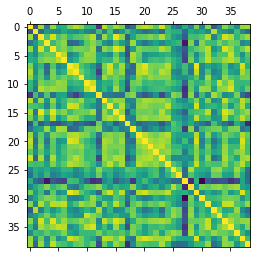

In [9]:
import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)

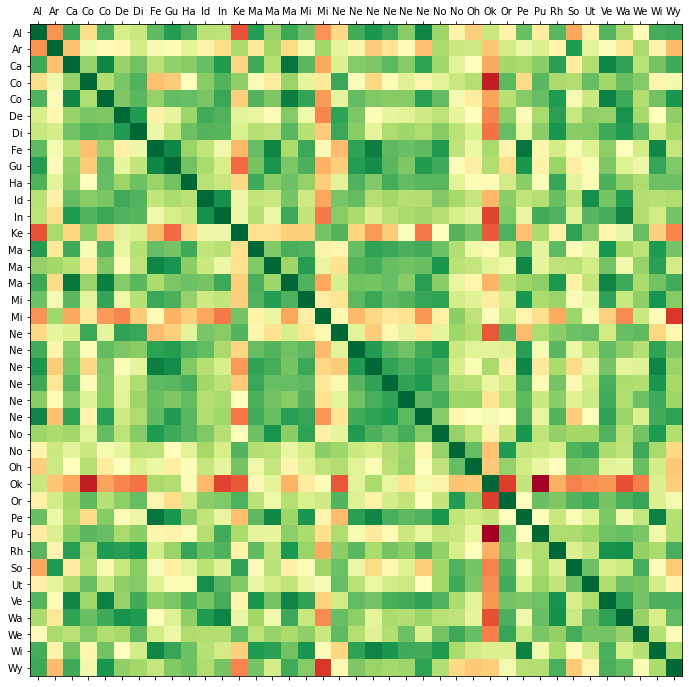

In [15]:
labels = [c[:2] for c in min_wage_corr.columns]

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)    #1X1 grid, number 1 figure

ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)


plt.show()

In [16]:
import requests

web = requests.get("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")
dfs = pd.read_html(web.text)

In [19]:
dfs = pd.read_html("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")
dfs

[          State/District Abbreviation Postal Code
 0                Alabama         Ala.          AL
 1                 Alaska       Alaska          AK
 2                Arizona        Ariz.          AZ
 3               Arkansas         Ark.          AR
 4             California       Calif.          CA
 5               Colorado        Colo.          CO
 6            Connecticut        Conn.          CT
 7               Delaware         Del.          DE
 8   District of Columbia         D.C.          DC
 9                Florida         Fla.          FL
 10               Georgia          Ga.          GA
 11                Hawaii       Hawaii          HI
 12                 Idaho        Idaho          ID
 13              Illinois         Ill.          IL
 14               Indiana         Ind.          IN
 15                  Iowa         Iowa          IA
 16                Kansas        Kans.          KS
 17              Kentucky          Ky.          KY
 18             Louisiana      

In [21]:
state_abbrev = dfs[0]

state_abbrev.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [23]:
state_abbrev.to_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/state_abbrev.csv')

In [25]:
state_abbrev[["State/District", 'Postal Code']].to_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/state_abbrev.csv', index=False)

# Cause index is worthless in this case

In [30]:
df_state_abbrev = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/state_abbrev.csv', index_col=0)
df_state_abbrev.head()

,Postal Code
State/District,
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA


In [ ]:
abbv_dict = df_state_abbrev.to_dict()

abbv_dict

Since its a dictionary of dictionary we want, we can map the required dictionaries to what we want

In [33]:
abbv_dict = abbv_dict["Postal Code"]

In [37]:
abbv_dict.update({'Guam': 'GU', 'Puerto Rico': 'PU', 'Federal (FLSA)': 'FLSA'})

In [38]:
abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Federal (FLSA)': 'FLSA',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Guam': 'GU',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Puerto Rico': 'PU',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': '

In [39]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]

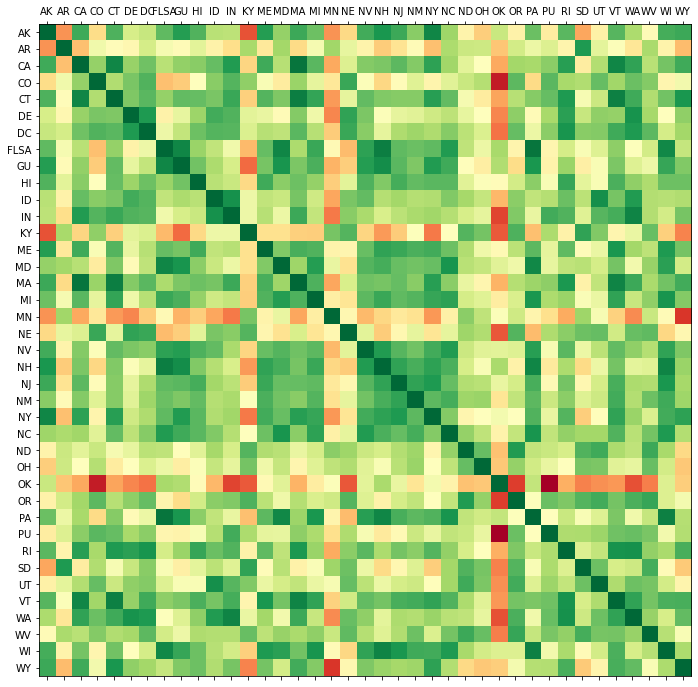

In [42]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)

ax.set_yticks(np.arange(len(labels)))
ax.set_xticks(np.arange(len(labels)))

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()

Here we learned how to combine datas from different datasets to use it for our labels in the matplotlib show